In [1096]:
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [1097]:
#File to load
student_dropout_data = Path(r"C:\Users\jasmi\OneDrive\Documents\Project_3\Resources\student dropout.csv")

#Read and store file into Pandas dataframe
dropout_df = pd.read_csv(student_dropout_data)
dropout_df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [1098]:
dropout_total = dropout_df[dropout_df['Dropped_Out'] == True]
dropouts = len(dropout_total)
dropouts

100

In [1099]:
parents_together = dropout_df[dropout_df['Parental_Status'] == 'A']
total_parents_together = len(parents_together)
total_parents_together

80

In [1100]:
parents_together_dropouts = dropout_df[(dropout_df['Parental_Status']== 'A') & (dropout_df['Dropped_Out']== True)]
parents_together_dropouts_total = len(parents_together_dropouts)
parents_together_dropouts_total

12

In [1101]:
parents_apart = dropout_df[dropout_df['Parental_Status'] == 'T']
total_parents_apart = len(parents_apart)
total_parents_apart

569

In [1102]:
parents_apart_dropouts = dropout_df[(dropout_df['Parental_Status'] == 'T') & (dropout_df['Dropped_Out'] == True)]
parents_apart_dropouts_total= len(parents_apart_dropouts)
parents_apart_dropouts_total

88

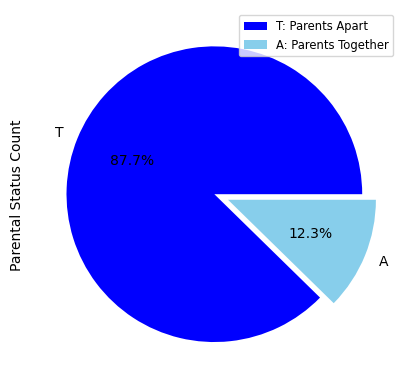

In [1103]:
#Parents apart
apart_counts = dropout_df.Parental_Status.value_counts()
status= ['T: Parents Apart', 'A: Parents Together']
colors = ['blue', 'skyblue']
explode = (0,0.1)
plt.pie(apart_counts.values, labels = apart_counts.index.values, autopct = "%1.1f%%" , colors=colors, explode = explode)
plt.ylabel("Parental Status Count")
plt.legend(labels=status, loc='upper right', fontsize= 'small')
plt.show()

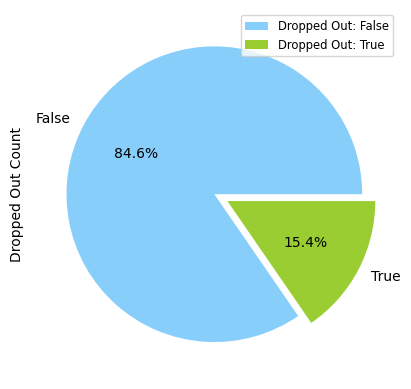

In [1104]:
dropout_counts = dropout_df.Dropped_Out.value_counts()
dropout = ['Dropped Out: False', 'Dropped Out: True']
colors = ['lightskyblue', 'yellowgreen']
explode = (0,0.1)
plt.pie(dropout_counts.values, labels = dropout_counts.index.values, autopct = "%1.1f%%" , colors = colors, explode = explode)
plt.ylabel("Dropped Out Count")
plt.legend(labels = dropout, loc = 'upper right', fontsize = 'small')
plt.show()

In [1105]:
data= {'Total Drop Outs': [dropouts],
    'Total Parents Together': [total_parents_together], 
       'Parents Together Drop Outs': [parents_together_dropouts_total],
       'Total Parents Apart': [total_parents_apart],
       'Parents Apart Drop Outs': [parents_apart_dropouts_total]}
data

{'Total Drop Outs': [100],
 'Total Parents Together': [80],
 'Parents Together Drop Outs': [12],
 'Total Parents Apart': [569],
 'Parents Apart Drop Outs': [88]}

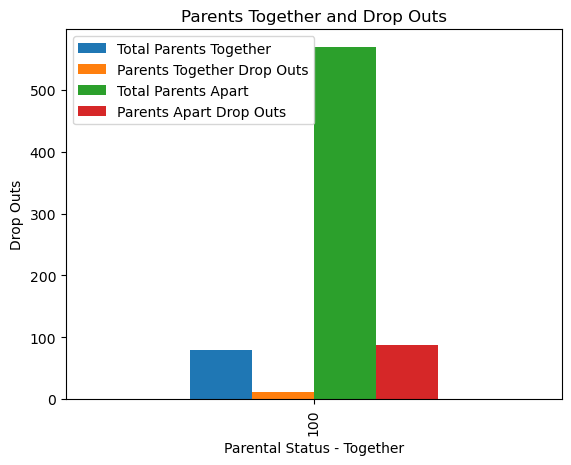

In [1106]:
df = pd.DataFrame(data)
df.set_index('Total Drop Outs', inplace = True)
df.plot(kind='bar')
plt.legend(loc='upper left')
plt.title('Parents Together and Drop Outs')
plt.xlabel('Parental Status - Together')
plt.ylabel('Drop Outs')
plt.show()

In [1107]:
df = pd.DataFrame(data)
data_json = df.to_json(orient = 'records')

In [1108]:
from pymongo import MongoClient
 
def check_mongodb_connection():
    try:
        client = MongoClient('mongodb://localhost:27017/', serverSelectionTimeoutMS=5000)
        client.server_info()  # Will throw an exception if unable to connect
        print("Successfully connected to MongoDB!")
        return True
    except Exception as e:
        print(f"Failed to connect to MongoDB. Error: {e}")
        return False
 
if __name__ == "__main__":
    check_mongodb_connection()

Successfully connected to MongoDB!


In [1109]:
import pandas as pd
from pymongo import MongoClient
import json
 
# Read the CSV file
csv_file_path = r'C:\Users\jasmi\OneDrive\Documents\Project_3\Resources\student dropout.csv'
df = pd.read_csv(csv_file_path)
 
# Convert DataFrame to list of dictionaries
data = df.to_dict('records')
 
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['student_dropout_db']
collection = db['student_data']
 
# Insert data into MongoDB
result = collection.insert_many(data)
 
print(f"Inserted {len(result.inserted_ids)} documents into MongoDB")
 
# Optional: Verify data insertion
print(f"Total documents in collection: {collection.count_documents({})}")
 
# Close the MongoDB connection
client.close()


Inserted 649 documents into MongoDB
Total documents in collection: 44132


In [1110]:
from pymongo import MongoClient
from pprint import pprint
 
def verify_mongodb_data():
    # Connect to MongoDB
    client = MongoClient('mongodb://localhost:27017/')
    db = client['student_dropout_db']
    collection = db['student_data']
 
    # 1. Count the number of documents
    doc_count = collection.count_documents({})
    print(f"Total number of documents: {doc_count}")
 
    # 2. View the first document
    print("\nFirst document in the collection:")
    pprint(collection.find_one())
 
    # 3. View a sample of documents
    print("\nSample of 5 documents:")
    for doc in collection.find().limit(5):
        pprint(doc)
 
    # 4. Check for specific data
    print("\nNumber of students who dropped out:")
    dropout_count = collection.count_documents({"Dropped_Out": True})
    print(dropout_count)
 
    # 5. View distinct values in a field
    print("\nDistinct values in 'Parental_Status' field:")
    distinct_parental_status = collection.distinct("Parental_Status")
    print(distinct_parental_status)
 
    # Close the connection
    client.close()
 
if __name__ == "__main__":
    verify_mongodb_data()

Total number of documents: 44132

First document in the collection:
{'Address': 'U',
 'Age': 18,
 'Attended_Nursery': 'yes',
 'Dropped_Out': False,
 'Extra_Curricular_Activities': 'no',
 'Extra_Paid_Class': 'no',
 'Family_Relationship': 4,
 'Family_Size': 'GT3',
 'Family_Support': 'no',
 'Father_Education': 4,
 'Father_Job': 'teacher',
 'Final_Grade': 11,
 'Free_Time': 3,
 'Gender': 'F',
 'Going_Out': 4,
 'Grade_1': 0,
 'Grade_2': 11,
 'Guardian': 'mother',
 'Health_Status': 3,
 'In_Relationship': 'no',
 'Internet_Access': 'no',
 'Mother_Education': 4,
 'Mother_Job': 'at_home',
 'Number_of_Absences': 4,
 'Number_of_Failures': 0,
 'Parental_Status': 'A',
 'Reason_for_Choosing_School': 'course',
 'School': 'GP',
 'School_Support': 'yes',
 'Study_Time': 2,
 'Travel_Time': 2,
 'Wants_Higher_Education': 'yes',
 'Weekday_Alcohol_Consumption': 1,
 'Weekend_Alcohol_Consumption': 1,
 '_id': ObjectId('6715795bed14822e66fa5717')}

Sample of 5 documents:
{'Address': 'U',
 'Age': 18,
 'Attended_Nur